<a href="https://colab.research.google.com/github/weathon/CHEM434/blob/main/ADSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget file.weasoft.com/nohup.out > adsb.jsonl
# !pip3 install basemap
# !pip install basemap-data-hires

--2023-11-15 03:51:46--  http://file.weasoft.com/nohup.out
Resolving file.weasoft.com (file.weasoft.com)... 149.28.13.194
Connecting to file.weasoft.com (file.weasoft.com)|149.28.13.194|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2801920 (2.7M)
Saving to: ‘nohup.out.1’

nohup.out.1         100%[===================>]   2.67M  4.57MB/s    in 0.6s    

2023-11-15 03:51:47 (4.57 MB/s) - ‘nohup.out.1’ saved [2801920/2801920]



In [ ]:
import json
data = []
with open("nohup.out", "r") as f:
  for i in f.read().split("\n\n"):
    if i !="":
      data.append(json.loads(i))

In [ ]:
lats = []
lons = []
lab = []
for i in data:
  lats.extend(aircraft['lat'] for aircraft in i["ac"])
  lons.extend(aircraft['lon'] for aircraft in i["ac"])
  lab.extend(aircraft['t'] for aircraft in i["ac"])
  # lab.extend(aircraft['category'] if 'category' in aircraft.keys() else "0" for aircraft in i["ac"])

In [ ]:
legend = list(set(lab))

In [ ]:
legend

In [ ]:
import pandas as pd
import geopandas
df = pd.DataFrame({"lat" : lats, "lon":lons, "lab": [str(i) for i in lab]})#[legend.index(i) for i in lab]})
gdf = geopandas.GeoDataFrame(
    df["lab"], geometry=geopandas.points_from_xy(df.lon, df.lat), crs="epsg:4326"
)

In [ ]:
gdf.crs

In [ ]:
import contextily as cx
import geopandas
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt

In [ ]:
minlat, minlon, maxlat, maxlon = gdf.total_bounds

<Axes: >

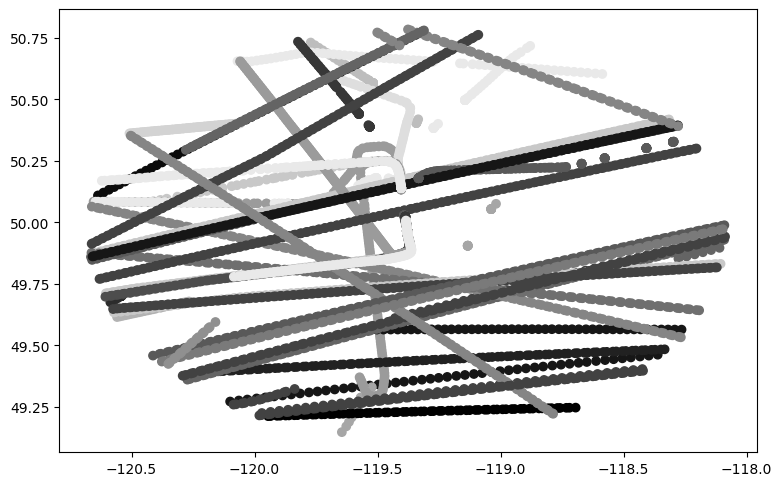

In [ ]:
gdf.plot(column="lab", aspect="equal", figsize=(9,20), cmap="gray") #touyunzhidaokole kouke kanzhege fangxiangyecuole yuanlai lat lin fgaofanle xonaggo

In [ ]:
!pip install mapclassify

In [ ]:
import geodatasets
nybb = geopandas.read_file(geodatasets.get_path("nybb"))

In [ ]:
gdf.explore(column="lab")

In [ ]:
!pip install geodatasets